In [4]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')

# Make plots appear in notebook
%matplotlib inline

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [5]:
ratings = pd.read_csv('../data/ml-25m/ratings.csv')

print(f"✓ Loaded {len(ratings):,} ratings")
print(f"Shape: {ratings.shape}")
print("\nFirst few rows:")
ratings.head()

✓ Loaded 25,000,095 ratings
Shape: (25000095, 4)

First few rows:


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [6]:
print("Column Information:")
print(ratings.info())

print("\n" + "="*50)
print("\nBasic Statistics:")
ratings.describe()

Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB
None


Basic Statistics:


,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [7]:
print(f"Unique users: {ratings['userId'].nunique():,}")
print(f"Unique movies: {ratings['movieId'].nunique():,}")
print(f"Total ratings: {len(ratings):,}")

Unique users: 162,541
Unique movies: 59,047
Total ratings: 25,000,095


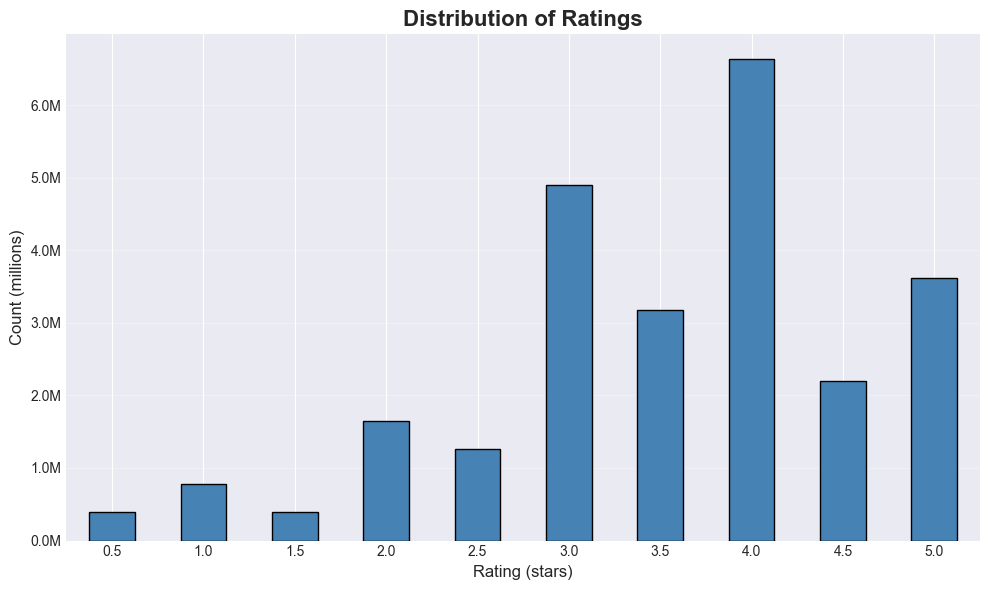


Rating counts:
rating
0.5     393068
1.0     776815
1.5     399490
2.0    1640868
2.5    1262797
3.0    4896928
3.5    3177318
4.0    6639798
4.5    2200539
5.0    3612474
Name: count, dtype: int64


In [8]:
rating_counts = ratings['rating'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Distribution of Ratings', fontsize=16, fontweight='bold')
plt.xlabel('Rating (stars)', fontsize=12)
plt.ylabel('Count (millions)', fontsize=12)
plt.xticks(rotation=0)

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e6:.1f}M'))

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nRating counts:")
print(rating_counts)

User Activity Statistics:
Average ratings per user: 153.8
Median ratings per user: 71.0
Min ratings per user: 20
Max ratings per user: 32202


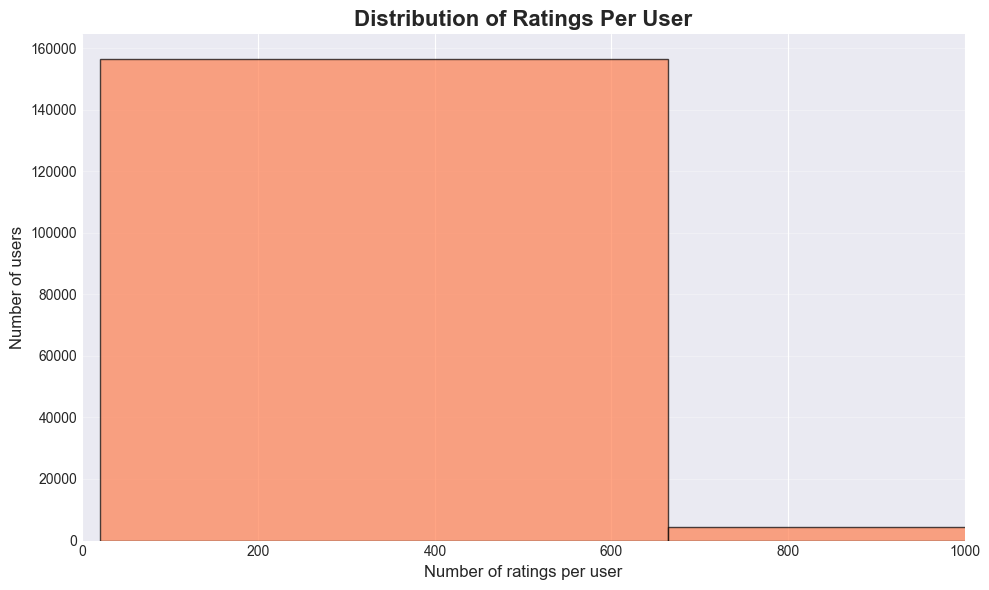

In [9]:
ratings_per_user = ratings.groupby('userId').size()

print("User Activity Statistics:")
print(f"Average ratings per user: {ratings_per_user.mean():.1f}")
print(f"Median ratings per user: {ratings_per_user.median():.1f}")
print(f"Min ratings per user: {ratings_per_user.min()}")
print(f"Max ratings per user: {ratings_per_user.max()}")

plt.figure(figsize=(10, 6))
plt.hist(ratings_per_user, bins=50, color='coral', edgecolor='black', alpha=0.7)
plt.title('Distribution of Ratings Per User', fontsize=16, fontweight='bold')
plt.xlabel('Number of ratings per user', fontsize=12)
plt.ylabel('Number of users', fontsize=12)
plt.xlim(0, 1000)  # Focus on 0-1000 range for visibility
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

In [10]:
ratings_per_movie = ratings.groupby('movieId').size()

print("Movie Popularity Statistics:")
print(f"Average ratings per movie: {ratings_per_movie.mean():.1f}")
print(f"Median ratings per movie: {ratings_per_movie.median():.1f}")
print(f"Min ratings per movie: {ratings_per_movie.min()}")
print(f"Max ratings per movie: {ratings_per_movie.max()}")

Movie Popularity Statistics:
Average ratings per movie: 423.4
Median ratings per movie: 6.0
Min ratings per movie: 1
Max ratings per movie: 81491


In [11]:
most_rated_movie_id = ratings_per_movie.idxmax()
most_rated_count = ratings_per_movie.max()

movies = pd.read_csv('../data/ml-25m/movies.csv')

movie_title = movies[movies['movieId'] == most_rated_movie_id]['title'].values[0]

print(f"Most rated movie:")
print(f"  Title: {movie_title}")
print(f"  Ratings: {most_rated_count:,}")
print(f"\nTop 10 most rated movies:")

top_10_ids = ratings_per_movie.nlargest(10).index
top_10_counts = ratings_per_movie.nlargest(10).values

for i, (movie_id, count) in enumerate(zip(top_10_ids, top_10_counts), 1):
    title = movies[movies['movieId'] == movie_id]['title'].values[0]
    print(f"{i:2d}. {title:50s} - {count:,} ratings")

Most rated movie:
  Title: Forrest Gump (1994)
  Ratings: 81,491

Top 10 most rated movies:
 1. Forrest Gump (1994)                                - 81,491 ratings
 2. Shawshank Redemption, The (1994)                   - 81,482 ratings
 3. Pulp Fiction (1994)                                - 79,672 ratings
 4. Silence of the Lambs, The (1991)                   - 74,127 ratings
 5. Matrix, The (1999)                                 - 72,674 ratings
 6. Star Wars: Episode IV - A New Hope (1977)          - 68,717 ratings
 7. Jurassic Park (1993)                               - 64,144 ratings
 8. Schindler's List (1993)                            - 60,411 ratings
 9. Braveheart (1995)                                  - 59,184 ratings
10. Fight Club (1999)                                  - 58,773 ratings


Sample matrix shape: (100, 100)
Filled values: 9,262 out of 10,000
Sparsity: 7.38%


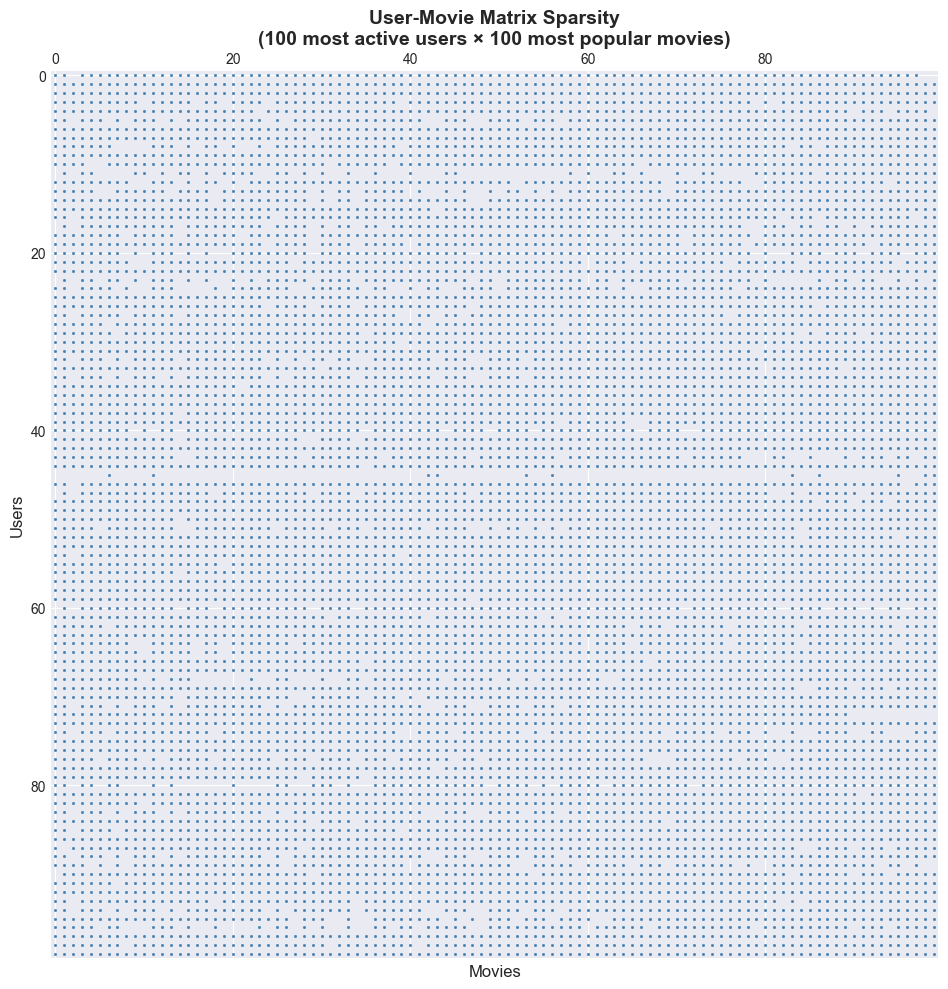

In [12]:
sample_size = 100

top_users = ratings_per_user.nlargest(sample_size).index

top_movies = ratings_per_movie.nlargest(sample_size).index


sample_ratings = ratings[
    (ratings['userId'].isin(top_users)) & 
    (ratings['movieId'].isin(top_movies))
]

matrix_sample = sample_ratings.pivot_table(
    index='userId',
    columns='movieId', 
    values='rating'
)

print(f"Sample matrix shape: {matrix_sample.shape}")
print(f"Filled values: {matrix_sample.notna().sum().sum():,} out of {matrix_sample.size:,}")
print(f"Sparsity: {(1 - matrix_sample.notna().sum().sum() / matrix_sample.size) * 100:.2f}%")

plt.figure(figsize=(12, 10))
# 1 where rating exists, 0 where NaN
plt.spy(matrix_sample.notna(), markersize=1, color='steelblue')
plt.title('User-Movie Matrix Sparsity\n(100 most active users × 100 most popular movies)', 
          fontsize=14, fontweight='bold')
plt.xlabel('Movies', fontsize=12)
plt.ylabel('Users', fontsize=12)
plt.tight_layout()
plt.show()

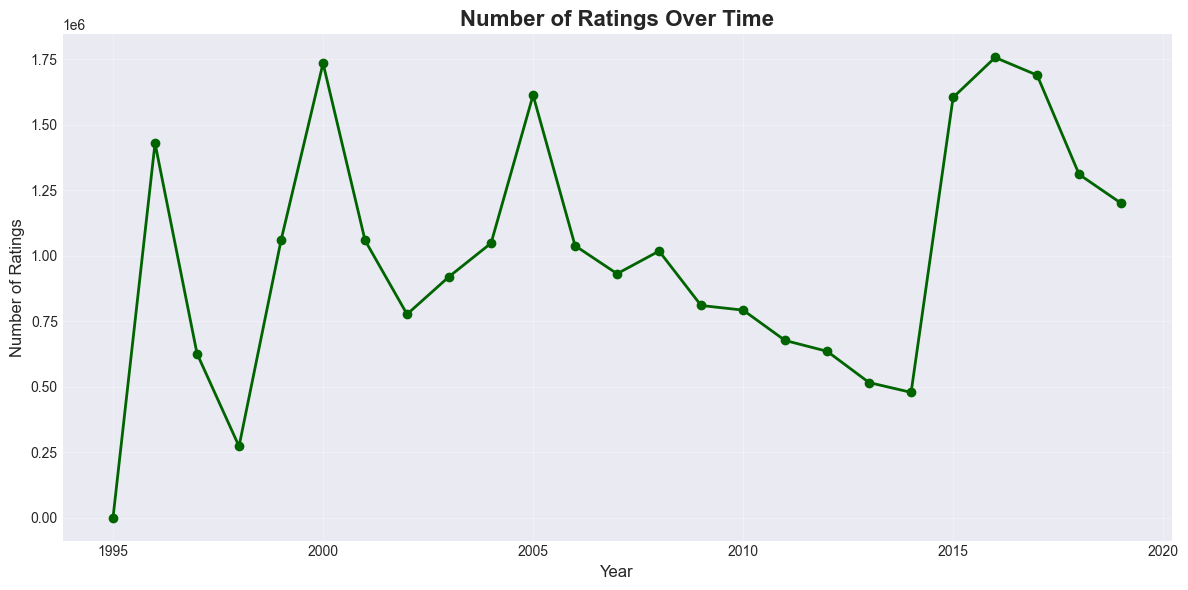


Ratings timeline:
First rating: 1995-01-09 11:46:49
Last rating: 2019-11-21 09:15:03
Peak year: 2016 with 1,757,440 ratings


In [13]:
ratings['datetime'] = pd.to_datetime(ratings['timestamp'], unit='s')
ratings['year'] = ratings['datetime'].dt.year

ratings_by_year = ratings.groupby('year').size()

plt.figure(figsize=(12, 6))
ratings_by_year.plot(kind='line', color='darkgreen', linewidth=2, marker='o')
plt.title('Number of Ratings Over Time', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Ratings', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\nRatings timeline:")
print(f"First rating: {ratings['datetime'].min()}")
print(f"Last rating: {ratings['datetime'].max()}")
print(f"Peak year: {ratings_by_year.idxmax()} with {ratings_by_year.max():,} ratings")

In [14]:
print("="*60)
print("MOVIELENS 25M DATASET - KEY INSIGHTS")
print("="*60)

print("\nDATASET SIZE:")
print(f"  - Total ratings: {len(ratings):,}")
print(f"  - Unique users: {ratings['userId'].nunique():,}")
print(f"  - Unique movies: {ratings['movieId'].nunique():,}")

print("\nRATING DISTRIBUTION:")
print(f"  - Average rating: {ratings['rating'].mean():.2f} / 5.0")
print(f"  - Rating range: {ratings['rating'].min()} - {ratings['rating'].max()}")
print(f"  - Most common rating: 4.0 stars")

print("\nUSER ACTIVITY:")
print(f"  - Average ratings per user: {ratings_per_user.mean():.1f}")
print(f"  - Most active user: {ratings_per_user.max():,} ratings")

print("\nMOVIE POPULARITY:")
print(f"  - Average ratings per movie: {ratings_per_movie.mean():.1f}")
print(f"  - Most rated: Forrest Gump ({ratings_per_movie.max():,} ratings)")

print("\nSPARSITY:")
print(f"  - Matrix density: 0.26% (99.74% empty)")
print(f"  - Challenge: Cold start and sparse data")

print("\nTEMPORAL PATTERNS:")
print(f"  - Date range: {ratings['datetime'].min().year} - {ratings['datetime'].max().year}")
print(f"  - Peak year: 2016")

print("\nIMPLICATIONS FOR MODELING:")
print("  - Need algorithms that handle extreme sparsity")
print("  - Matrix factorization and neural networks preferred")
print("  - Temporal train/test split recommended")
print("  - Consider user/movie biases (positive skew)")

print("\n" + "="*60)

MOVIELENS 25M DATASET - KEY INSIGHTS

DATASET SIZE:
  - Total ratings: 25,000,095
  - Unique users: 162,541
  - Unique movies: 59,047

RATING DISTRIBUTION:
  - Average rating: 3.53 / 5.0
  - Rating range: 0.5 - 5.0
  - Most common rating: 4.0 stars

USER ACTIVITY:
  - Average ratings per user: 153.8
  - Most active user: 32,202 ratings

MOVIE POPULARITY:
  - Average ratings per movie: 423.4
  - Most rated: Forrest Gump (81,491 ratings)

SPARSITY:
  - Matrix density: 0.26% (99.74% empty)
  - Challenge: Cold start and sparse data

TEMPORAL PATTERNS:
  - Date range: 1995 - 2019
  - Peak year: 2016

IMPLICATIONS FOR MODELING:
  - Need algorithms that handle extreme sparsity
  - Matrix factorization and neural networks preferred
  - Temporal train/test split recommended
  - Consider user/movie biases (positive skew)



In [15]:
movies.head()


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
